# NetworkX exercise 

In [1]:
%matplotlib inline
import networkx as nx
import vis_bel
import os
import pickle
import imp
import numpy as np
import itertools as itt

In [2]:
base = os.environ['BUG_FREE_EUREKA_BASE']
path_networkx_AD_pickled =os.path.join(base,'data','exercise05','networkx.graph.AD.pickled')

## Loading Alzheimer's disease network into networkX graph with pickle

In [3]:
graph_AD = pickle.load(open(path_networkx_AD_pickled,'rb'))

In [4]:
type(graph_AD)

networkx.classes.multidigraph.MultiDiGraph

Here some words about [pickle](https://docs.python.org/3/library/pickle.html)

### Explore

In [5]:
len(graph_AD), len(graph_AD.nodes()), graph_AD.number_of_nodes()  # number of nodes

(11927, 11927, 11927)

In [6]:
graph_AD.number_of_edges() # number of nodes

59408

In [7]:
graph_AD[1] # node 1 connections with edge information

{2: {0: {'Subgraph': ('Non-amyloidogenic pathway', 'Gamma secretase pathway'),
   'citation': ('Other', 'Connectors', '123'),
   'evidence': 'The statements inside this citation is included to connect two entity types or triples, which will exist as islands/subnetworks in the big model.',
   'object_activity': 'act',
   'rel': 'decreases'},
  1: {'DiseaseState': ('Mild AD',),
   'FDASTATUS': ('Phase 3',),
   'Subgraph': ('Notch pathway', 'Gamma secretase pathway'),
   'citation': ('PubMed', 'Curr Med Chem. 2011;18(35):5430-47', '22087836'),
   'evidence': 'gamma-Secretase inhibitor believed to be associated with the inhibition of the cleavage of Notch, a transmembrane receptor involved in regulating cell-fate decisions.',
   'object_activity': 'pep',
   'rel': 'decreases'}},
 1828: {0: {'DiseaseState': ('Mild AD',),
   'FDASTATUS': ('Phase 3',),
   'Subgraph': ('Notch pathway', 'Gamma secretase pathway'),
   'citation': ('PubMed', 'Curr Med Chem. 2011;18(35):5430-47', '22087836'),
   '

In [8]:
graph_AD[1].keys() # nodes ids connected to node 1 

dict_keys([2, 1828])

In [9]:
graph_AD[1][2].keys()
# edge between these both

dict_keys([0, 1])

In [10]:
graph_AD[1][2][0].keys()
graph_AD[1][2][0]

{'Subgraph': ('Non-amyloidogenic pathway', 'Gamma secretase pathway'),
 'citation': ('Other', 'Connectors', '123'),
 'evidence': 'The statements inside this citation is included to connect two entity types or triples, which will exist as islands/subnetworks in the big model.',
 'object_activity': 'act',
 'rel': 'decreases'}

In [11]:
graph_AD[1][2][0].get('rel')

'decreases'

In [12]:
graph_AD.nodes()[:2] # all nodes

[1, 2]

In [13]:
graph_AD.nodes(data=True)[:2]

[(1,
  {'BEL': 'a(CHEBI:"gamma-secretase inhibitor")',
   'function': 'a',
   'namespace': 'CHEBI',
   'value': 'gamma-secretase inhibitor'}),
 (2,
  {'BEL': 'complex(SCOMP:"gamma Secretase Complex")',
   'function': 'complex',
   'namespace': 'SCOMP',
   'value': '"gamma Secretase Complex"'})]

In [14]:
graph_AD.edges()[:2]

[(1, 2), (1, 2)]

In [15]:
graph_AD.edges(data=True,keys=True)[:2]
# keys => number of edges inside 

[(1,
  2,
  0,
  {'Subgraph': ('Non-amyloidogenic pathway', 'Gamma secretase pathway'),
   'citation': ('Other', 'Connectors', '123'),
   'evidence': 'The statements inside this citation is included to connect two entity types or triples, which will exist as islands/subnetworks in the big model.',
   'object_activity': 'act',
   'rel': 'decreases'}),
 (1,
  2,
  1,
  {'DiseaseState': ('Mild AD',),
   'FDASTATUS': ('Phase 3',),
   'Subgraph': ('Notch pathway', 'Gamma secretase pathway'),
   'citation': ('PubMed', 'Curr Med Chem. 2011;18(35):5430-47', '22087836'),
   'evidence': 'gamma-Secretase inhibitor believed to be associated with the inhibition of the cleavage of Notch, a transmembrane receptor involved in regulating cell-fate decisions.',
   'object_activity': 'pep',
   'rel': 'decreases'})]

```
[(1, 
  2,
  0, <- index of the edge
```

In [16]:
#nodes = np.random.choice(graph,size=100,replace=False)


In [17]:
nodes = set(itt.chain.from_iterable((formN,toN) for formN,toN  in graph_AD.edges()[:100]))

In [18]:
graph_100 = graph_AD.subgraph(nodes)
# creating a subgraph 

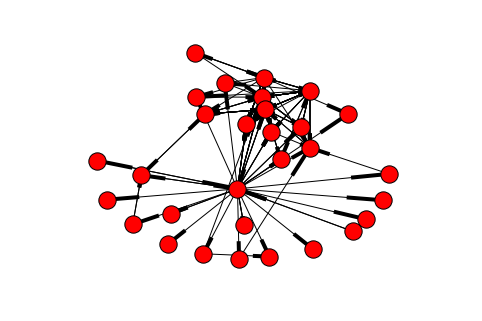

In [19]:
nx.draw(graph_100)

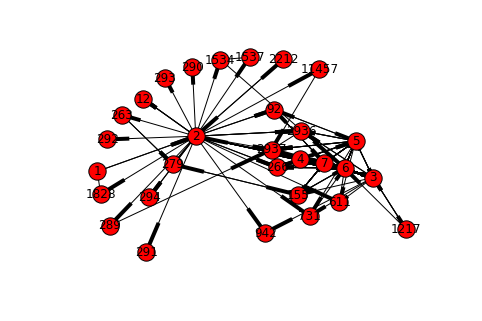

In [20]:
nx.draw_spring(graph_100, with_labels=True)
# delegates everything to the draw function

# 

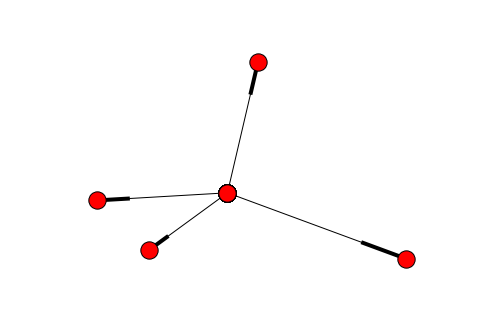

In [21]:
nx.draw_spectral(graph_100)
# eigenvalues

In [22]:
imp.reload(vis_bel)
vis_bel.draw(graph_100)


In [23]:
for edge in graph_100.edges_iter(data=True,keys=True):
    print(edge)
    break

(1, 2, 0, {'object_activity': 'act', 'citation': ('Other', 'Connectors', '123'), 'Subgraph': ('Non-amyloidogenic pathway', 'Gamma secretase pathway'), 'rel': 'decreases', 'evidence': 'The statements inside this citation is included to connect two entity types or triples, which will exist as islands/subnetworks in the big model.'})


In [24]:
for u,v,k,a in graph_100.edges_iter(data=True,keys=True):
    print(u,v,k,a)
    break

1 2 0 {'object_activity': 'act', 'citation': ('Other', 'Connectors', '123'), 'Subgraph': ('Non-amyloidogenic pathway', 'Gamma secretase pathway'), 'rel': 'decreases', 'evidence': 'The statements inside this citation is included to connect two entity types or triples, which will exist as islands/subnetworks in the big model.'}


## Tasks

0. Find the node with the highest degree in graph_100
0. get all distinct attribute keys in nodes and edges for graph_100
0. Write a function which allows you to search all edges in the graph_100 with any key (or key/value). Allow value to be optional
0. Find shortest paths between all nodes link to the edges found in the previsious task and create a new graph, display it 

### Task 1: Find the node with the highest degree in graph_100

In [25]:
import operator
max(graph_100.degree().items(), key=operator.itemgetter(1))[0]

6

In [26]:
dct_graph = graph_100.degree()
max(dct_graph, key=dct_graph.get)

6

### Task 2: Get all distinct attribute keys in nodes and edges for graph_100

In [27]:
distinct_nodes_attr = []
for item in graph_100.nodes(data=True):
    for attr in item[1].keys():
        if attr not in distinct_nodes_attr:
            distinct_nodes_attr.append(attr)
distinct_nodes_attr

['BEL', 'function', 'namespace', 'value', 'valid_NSV', 'list']

In [28]:
distinct_edges_attr = []
for item in graph_100.edges(data=True):
    for attr in item[2].keys():
        if attr not in distinct_edges_attr:
            distinct_edges_attr.append(attr)
distinct_edges_attr

['object_activity',
 'citation',
 'Subgraph',
 'rel',
 'evidence',
 'DiseaseState',
 'FDASTATUS',
 'subject_activity',
 'FluidAndSecretion',
 'NervousSystem',
 'CellStructure',
 'MeSHDisease',
 'UserdefinedCellLine',
 'DigestiveSystem',
 'Species',
 'Cell',
 'subject_translocation_from_namespace',
 'subject_translocation_to_value',
 'subject_translocation_from_value',
 'subject_translocation_to_namespace',
 'subject_translocation',
 'UserdefinedSpecies',
 'UserdefinedGender',
 'CellLine',
 'Duration_of_Chemical_Exposure',
 'Developmental_Phase__of_patient',
 'Encode_Feature_Types',
 'object_translocation_from_value',
 'object_translocation_to_namespace',
 'object_translocation',
 'object_translocation_from_namespace',
 'object_translocation_to_value',
 'Tissue',
 'CardiovascularSystem']

### Task 3: Write a function which allows you to search all edges in the graph_100 with any key (or key/value). Allow value to be optional

**hint** : Write a function which allows you to search all edges in the graph_100 with any key (or key/value). Allow value to be optional

In [29]:
def find_edges_by_attrib_key_value(graph, attribKey, attribValue=None):
    edge_list = []
    if attribValue is None:
        for item in graph_100.edges(data=True):
                if attribKey in item[2]:
                    edge_list.append(item)
    else:            
        for item in graph_100.edges(data=True):
            if attribKey in item[2]:
                if attribValue in item[2][attribKey]:
                    edge_list.append(item)                    
    return edge_list if edge_list else False

In [30]:
find_edges_by_attrib_key_value(graph_100, 'MeSHDisease')[:3]

[(2,
  2212,
  {'MeSHDisease': ('Alzheimer Disease',),
   'Subgraph': ('Phosphatidylinositol 3 pathway',),
   'citation': ('PubMed',
    'J Neurochem. 2007 Aug;102(3):848-57. Epub 2007 Apr 16',
    '17437536'),
   'evidence': "We previously showed that some familial Alzheimer's disease PS mutations cause increased basal and acetylcholine muscarinic receptor-stimulated phospholipase C (PLC) activity which was gamma-secretase dependent.",
   'rel': 'association'}),
 (2,
  7,
  {'MeSHDisease': ('Alzheimer Disease',),
   'Subgraph': ('Phosphatidylinositol 3 pathway',),
   'citation': ('PubMed',
    'J Neurochem. 2007 Aug;102(3):848-57. Epub 2007 Apr 16',
    '17437536'),
   'evidence': "We previously showed that some familial Alzheimer's disease PS mutations cause increased basal and acetylcholine muscarinic receptor-stimulated phospholipase C (PLC) activity which was gamma-secretase dependent.",
   'rel': 'association'}),
 (3,
  4,
  {'MeSHDisease': ('Alzheimer Disease',),
   'NervousSyst

In [31]:
find_edges_by_attrib_key_value(graph_100, 'MeSHDisease', 'Alzheimer Disease')[:3]

[(2,
  2212,
  {'MeSHDisease': ('Alzheimer Disease',),
   'Subgraph': ('Phosphatidylinositol 3 pathway',),
   'citation': ('PubMed',
    'J Neurochem. 2007 Aug;102(3):848-57. Epub 2007 Apr 16',
    '17437536'),
   'evidence': "We previously showed that some familial Alzheimer's disease PS mutations cause increased basal and acetylcholine muscarinic receptor-stimulated phospholipase C (PLC) activity which was gamma-secretase dependent.",
   'rel': 'association'}),
 (2,
  7,
  {'MeSHDisease': ('Alzheimer Disease',),
   'Subgraph': ('Phosphatidylinositol 3 pathway',),
   'citation': ('PubMed',
    'J Neurochem. 2007 Aug;102(3):848-57. Epub 2007 Apr 16',
    '17437536'),
   'evidence': "We previously showed that some familial Alzheimer's disease PS mutations cause increased basal and acetylcholine muscarinic receptor-stimulated phospholipase C (PLC) activity which was gamma-secretase dependent.",
   'rel': 'association'}),
 (3,
  4,
  {'MeSHDisease': ('Alzheimer Disease',),
   'NervousSyst

### Task 4: Find shortest paths between all nodes link to the edges found in the previsious task and create a new graph, display it

In [33]:
lst_edges_AD = find_edges_by_attrib_key_value(graph_100, 'MeSHDisease', 'Alzheimer Disease')
AD_subgraph = nx.MultiDiGraph()
AD_subgraph.add_edges_from(lst_edges_AD)
# # nx.shortest_path(graph_100, )
nx.shortest_path(AD_subgraph)

{2: {2: [2],
  3: [2, 7, 3],
  4: [2, 7, 3, 4],
  5: [2, 7, 3, 5],
  6: [2, 7, 3, 6],
  7: [2, 7],
  2212: [2, 2212]},
 3: {2: [3, 7, 2],
  3: [3],
  4: [3, 4],
  5: [3, 5],
  6: [3, 6],
  7: [3, 7],
  2212: [3, 7, 2, 2212]},
 4: {4: [4]},
 5: {2: [5, 3, 7, 2],
  3: [5, 3],
  4: [5, 3, 4],
  5: [5],
  6: [5, 3, 6],
  7: [5, 3, 7],
  2212: [5, 3, 7, 2, 2212]},
 6: {2: [6, 7, 2],
  3: [6, 3],
  4: [6, 3, 4],
  5: [6, 3, 5],
  6: [6],
  7: [6, 7],
  2212: [6, 7, 2, 2212]},
 7: {2: [7, 2],
  3: [7, 3],
  4: [7, 3, 4],
  5: [7, 3, 5],
  6: [7, 3, 6],
  7: [7],
  2212: [7, 2, 2212]},
 2212: {2: [2212, 2],
  3: [2212, 2, 7, 3],
  4: [2212, 2, 7, 3, 4],
  5: [2212, 2, 7, 3, 5],
  6: [2212, 2, 7, 3, 6],
  7: [2212, 2, 7],
  2212: [2212]}}

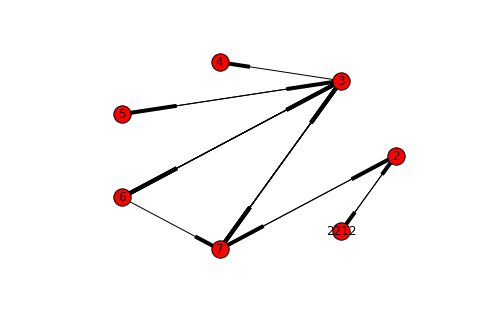

In [40]:
nx.draw_shell(AD_subgraph, with_labels=True)